# Customer segmentation

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Customer Segmentation.csv",encoding='latin')
print("Dataset with rows {} and columns {}".format(df.shape[0],df.shape[1]))
df.head()

Dataset with rows 541909 and columns 8


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## EDA - Exploratory Data Analysis

In [3]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Here we are droping na because the columns are unique so filling with approriate values can harm the model
# droping na values
df=df.dropna()

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Univariate Analysis

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

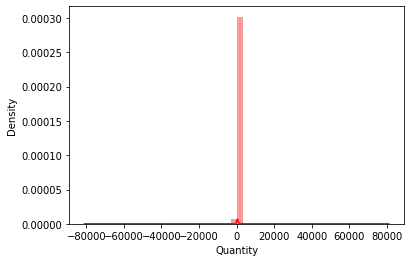

In [12]:
sns.distplot(df['Quantity'],color="red")

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

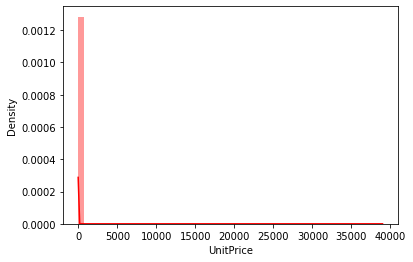

In [13]:
sns.distplot(df['UnitPrice'],color="red")

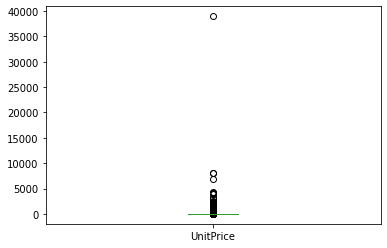

In [14]:
df.UnitPrice.plot.box()
plt.show()

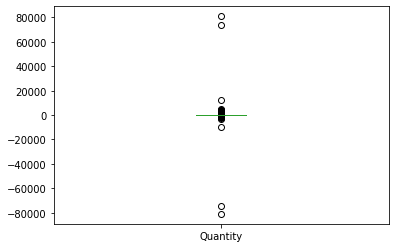

In [15]:
df.Quantity.plot.box()
plt.show()

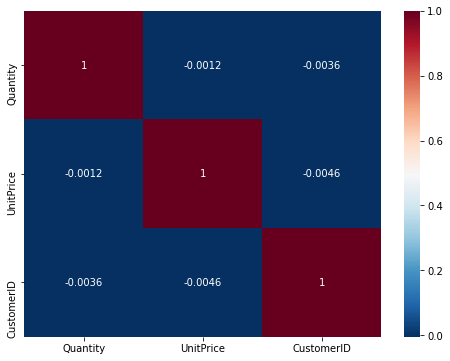

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')
plt.show()

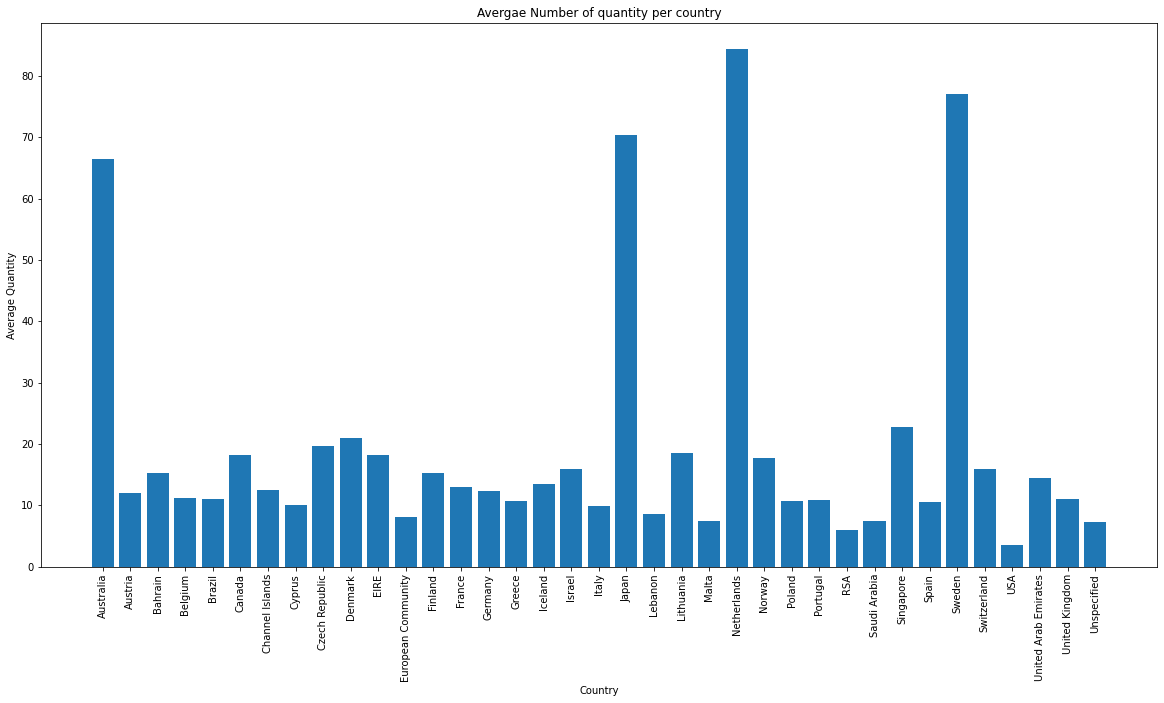

In [17]:

#country V/s Quantity

plt.figure(figsize =(20,10))

Quantity_by_Invoice = df.groupby('Country').Quantity.mean()

x= Quantity_by_Invoice.index.tolist()
y= Quantity_by_Invoice.values.tolist()

plt.xlabel('Country')
plt.ylabel('Average Quantity')
plt.xticks(rotation=90)


plt.title('Avergae Number of quantity per country')

plt.bar(x,y)
plt.show()


In [18]:
#sns.pairplot(df)

In [19]:
# Number of records with negative quantity
df.Quantity[df.Quantity < 0 ].count()

8905

In [20]:
# Quick inspection of top records with Negative Quantity
df.loc[df.Quantity < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


In [21]:
# Number of records with negative Unit Price 
df.UnitPrice[df.UnitPrice < 0].count()

0

In [22]:
# Quick exploration of negative price records
df.loc[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## Data Analysis, pre-processing & Feature engineering

In [23]:
# Breaking down Invoice Number into Code and Number
df['InvoiceNumber'] = df.InvoiceNo.astype(str).str[-6:]
df['InvoiceCode'] = df.InvoiceNo.astype(str).str[-7:-6]

In [24]:
# Transforming InvoiceDate column to datetime type and mapping to a new columne as InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [25]:
# Construct Year, Month and YearMonth from Invoice Date field
df['Year'], df['Month'] = df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month
df['YearMonth'] = df['InvoiceDate'].map(lambda x: 100*x.year + x.month)

In [26]:
# Create "Date" column in datetime format to use for index
df['Date'] = pd.to_datetime(df.InvoiceDate.dt.date)
df.set_index('Date', inplace=True)
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day
df['Hours'] = pd.DatetimeIndex(df['InvoiceDate']).hour

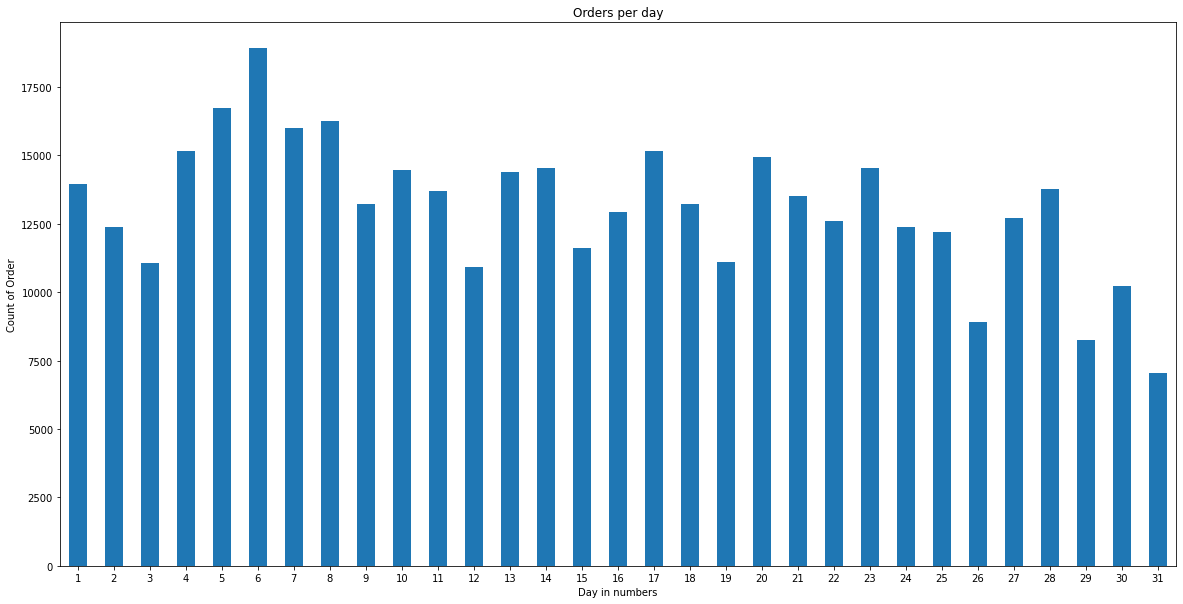

In [27]:
plt.figure(figsize =(20,10))
order_day = df.groupby(["Day"])["Quantity"].agg("count").plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Orders per day')
plt.xlabel('Day in numbers')
plt.ylabel('Count of Order')
plt.show()

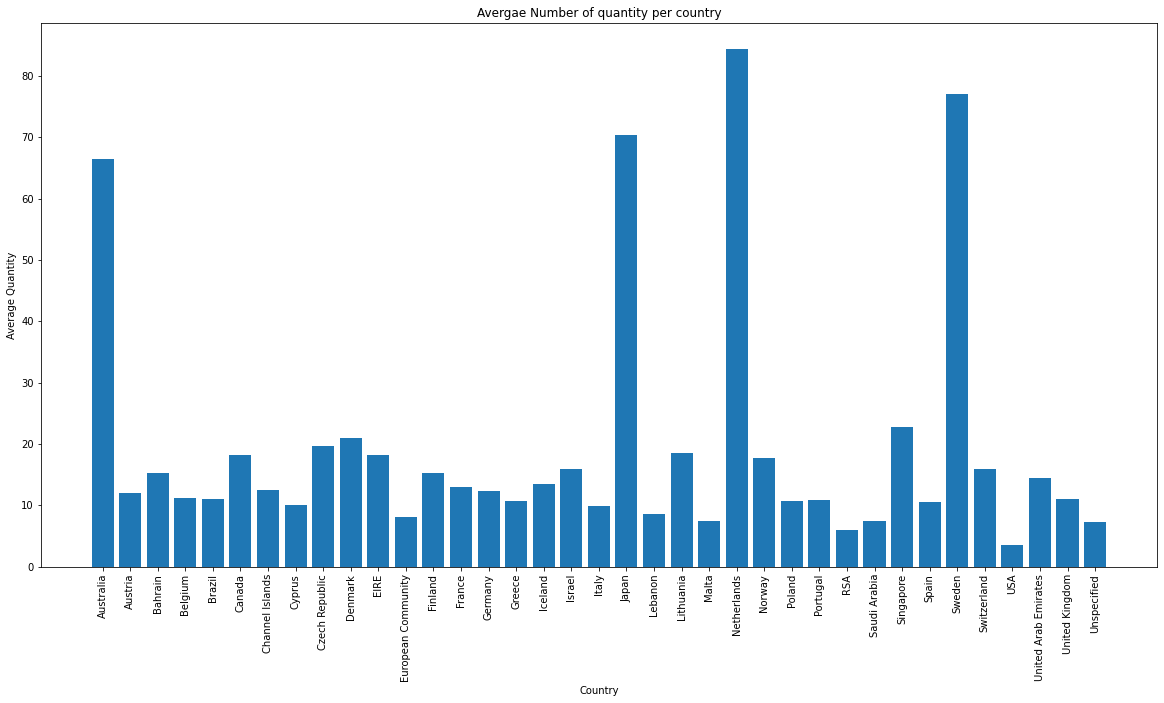

In [28]:
#country vs quantiy--

plt.figure(figsize =(20,10))

Quantity_by_Invoice = df.groupby('Country').Quantity.mean()

x= Quantity_by_Invoice.index.tolist()
y= Quantity_by_Invoice.values.tolist()

plt.xlabel('Country')
plt.ylabel('Average Quantity')
plt.xticks(rotation=90)


plt.title('Avergae Number of quantity per country')

plt.bar(x,y)
plt.show()

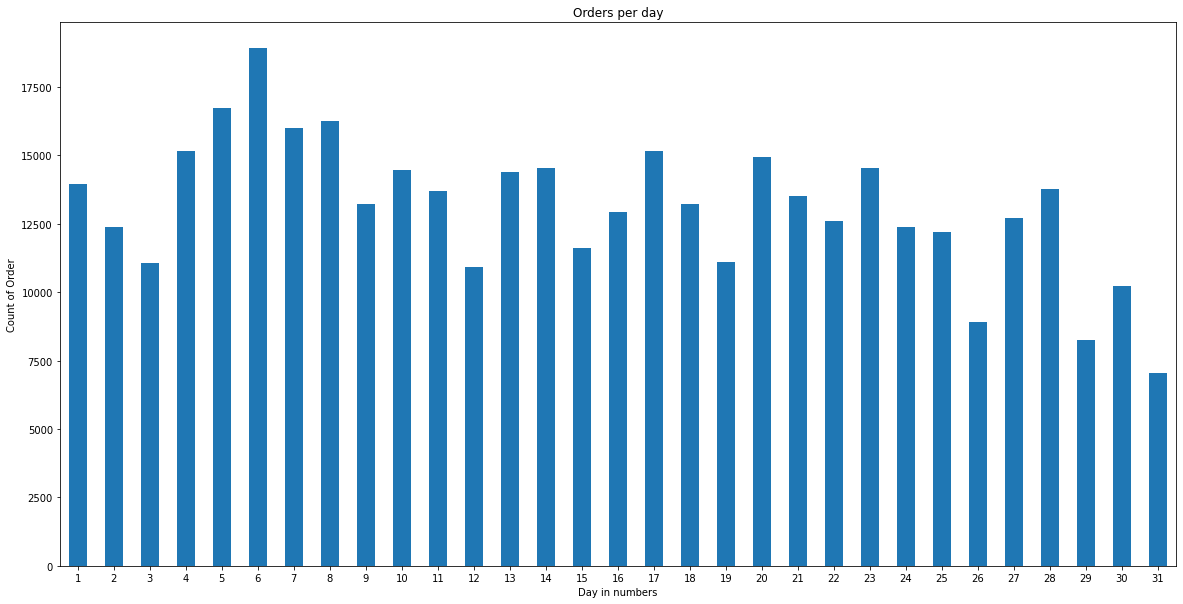

In [29]:
plt.figure(figsize =(20,10))
order_day = df.groupby(["Day"])["Quantity"].agg("count").plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Orders per day')
plt.xlabel('Day in numbers')
plt.ylabel('Count of Order')
plt.show()

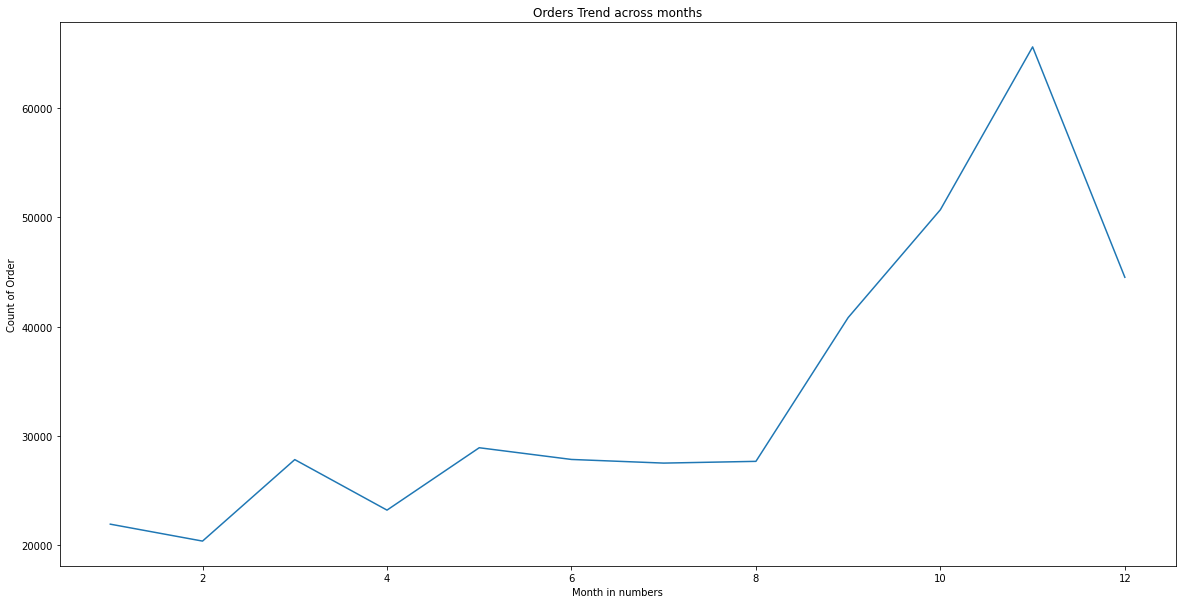

In [30]:
plt.figure(figsize =(20,10))
order_month = df.groupby(["Month"])["InvoiceNo"].agg("count").plot(kind = 'line')
plt.xticks(rotation=0)
plt.title('Orders Trend across months')
plt.xlabel('Month in numbers')
plt.ylabel('Count of Order')
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 406829 entries, 2010-12-01 to 2011-12-09
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  object        
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        406829 non-null  object        
 8   InvoiceNumber  406829 non-null  object        
 9   InvoiceCode    406829 non-null  object        
 10  Year           406829 non-null  int64         
 11  Month          406829 non-null  int64         
 12  YearMonth      406829 non-null  int64         
 13  Day            406829 non-null  int64         
 14  Hours          406829 non-null  int6

In [32]:
df.head

<bound method NDFrame.head of            InvoiceNo StockCode                          Description  Quantity  \
Date                                                                            
2010-12-01    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2010-12-01    536365     71053                  WHITE METAL LANTERN         6   
2010-12-01    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
2010-12-01    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2010-12-01    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...              ...       ...                                  ...       ...   
2011-12-09    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
2011-12-09    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
2011-12-09    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
2011-12-09    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4  

## Processing and EDA on new features

InvoiceNo processing

In [33]:
# Inspecting new features
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country,InvoiceNumber,InvoiceCode
count,406829,406829,406829,406829,406829,406829
unique,22190,3684,3896,37,22190,2
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,576339,
freq,542,2077,2070,361878,542,397924


In [34]:
# Counting types of Invoices
df.InvoiceCode.value_counts()

     397924
C      8905
Name: InvoiceCode, dtype: int64

In [35]:
# Unique values
df.InvoiceCode.unique()

array(['', 'C'], dtype=object)

In [36]:
# Replacing '' with 'N', to reflect Normal transactions
df.InvoiceCode.replace({'': 'N'}, inplace = True)
df.InvoiceCode.unique()

array(['N', 'C'], dtype=object)

In [37]:
# Inspecting type A and C invoices
df[df.InvoiceCode == "A"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Day,Hours
Date,,,,,,,,,,,,,,,


In [38]:
df[df.InvoiceCode == "C"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Day,Hours
Date,,,,,,,,,,,,,,,
2010-12-01,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,536379,C,2010,12,201012,1,9
2010-12-01,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,536383,C,2010,12,201012,1,9
2010-12-01,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,536391,C,2010,12,201012,1,10
2010-12-01,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,536391,C,2010,12,201012,1,10
2010-12-01,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,536391,C,2010,12,201012,1,10


InvoiceNo Validations

From initial review of the invoice numbers and code, it seems that for a specific Invoice Number, there's only a certain type available in the dataset. e.g. For Invoice type-C transactions verify if there is the corresponding N-type transaction. i.e same Invoice Number, different type.

In [39]:
df[df.InvoiceNumber == '536548']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Day,Hours
Date,,,,,,,,,,,,,,,
2010-12-01,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,2010-12-01 14:33:00,1.95,12472.0,Germany,536548,C,2010,12,201012,1,14
2010-12-01,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,2010-12-01 14:33:00,1.65,12472.0,Germany,536548,C,2010,12,201012,1,14
2010-12-01,C536548,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,2010-12-01 14:33:00,2.95,12472.0,Germany,536548,C,2010,12,201012,1,14
2010-12-01,C536548,22892,SET OF SALT AND PEPPER TOADSTOOLS,-7,2010-12-01 14:33:00,1.25,12472.0,Germany,536548,C,2010,12,201012,1,14
2010-12-01,C536548,22654,DELUXE SEWING KIT,-1,2010-12-01 14:33:00,5.95,12472.0,Germany,536548,C,2010,12,201012,1,14
2010-12-01,C536548,22767,TRIPLE PHOTO FRAME CORNICE,-2,2010-12-01 14:33:00,9.95,12472.0,Germany,536548,C,2010,12,201012,1,14
2010-12-01,C536548,22333,RETROSPOT PARTY BAG + STICKER SET,-1,2010-12-01 14:33:00,1.65,12472.0,Germany,536548,C,2010,12,201012,1,14
2010-12-01,C536548,22245,"HOOK, 1 HANGER ,MAGIC GARDEN",-2,2010-12-01 14:33:00,0.85,12472.0,Germany,536548,C,2010,12,201012,1,14
2010-12-01,C536548,22077,6 RIBBONS RUSTIC CHARM,-6,2010-12-01 14:33:00,1.65,12472.0,Germany,536548,C,2010,12,201012,1,14


In [40]:
# Get list of Invoice Numbers with C
invoice_numbers = list(df[df.InvoiceCode == "C"].InvoiceNumber)

In [41]:
# Create group list to iterate through
groups = df.groupby('InvoiceNumber')

In [42]:
contained_n_and_c = []

In [43]:

# For each group iterate through Invoice numbers:
# IF there's any invoice type N, then append and continue
for group in groups:
    
    group_id = group[0]
    data = group[1]
    
    if group_id in invoice_numbers:
        row_data = [row[-1] for row in data.values]
        if 'N' in row_data:
            contained_n_and_c.append(group_id)
        else:
            pass
    else:
        pass

In [44]:
# Test there's no overlap between type-C and type-N transactions in a single invoice
contained_n_and_c

[]

## Masks for Data Processing 

Creating various Masks to implement the rules per feature for narrowing down the active population

In [45]:

# Valid Price
valid_price = df.UnitPrice >= 0

# Valid Description
valid_desc = df.Description.notnull()

# Valid CID
valid_CID = df.CustomerID.notnull()

# Invoice type-N (Normal)
inv_N = df.InvoiceCode == "N"

# Invoice type-C (Cancellation)
inv_C = df.InvoiceCode == "C"

# Invoice type-N (Amendment)
inv_A = df.InvoiceCode == "A"

# Quantity Negative
q_neg = df.Quantity < 0 

# Quantity Positive
q_pos = df.Quantity >= 0

In [46]:
# Create a Masks Summary Dataframe to store and view the different count across masks
df_mask = pd.DataFrame(df.columns)
df_mask.columns = ['Features']

df_mask['Valid Prices'] = df[valid_price].count().values
df_mask['Valid Description'] = df[valid_desc].count().values
df_mask['Valid Customer IDs'] = df[valid_CID].count().values
df_mask['Invoice Normal'] = df[inv_N].count().values
df_mask['Invoice Cancellation'] = df[inv_C].count().values
df_mask['Invoice Adjustment'] = df[inv_A].count().values
df_mask['Negative Quantities'] = df[q_neg].count().values
df_mask['Positive Quantities'] = df[q_pos].count().values

Active Population - Paths to Nodes

In [47]:
# Path1 - Filter population down to include all 
# valid Customer IDs with Valid Price and Description
p1 = valid_price & valid_desc & valid_CID

In [48]:

# Path1 - Filter population down to include all 
# valid Customer IDs with Valid Price and Description
p1 = valid_price & valid_desc & valid_CID

# Path2 - Filter population down to include all 
# Normal (type-N) transactions with Positive Quantities
p2 = inv_N & q_pos

# Path3 - Filter population down to include all 
# Cancel (type-C) or Adjust (type-A) transactions 
# with Negative Quanitities
p3 = (inv_A | inv_C) & q_neg

# Path to Leafs: Combine Paths 1, 2 and 3:
# *************** CREATE A COPY ************
df_pp = df.loc[p1 & (p2 | p3)].copy()

# Inspect new pre-processed and clean dataset
df_pp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Day,Hours
Date,,,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,N,2010,12,201012,1,8
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,1,8
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,N,2010,12,201012,1,8
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,1,8
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,1,8


## Data Inspection and visualisations 

In [49]:
# Increase default figure and font sizes for easier viewing.
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

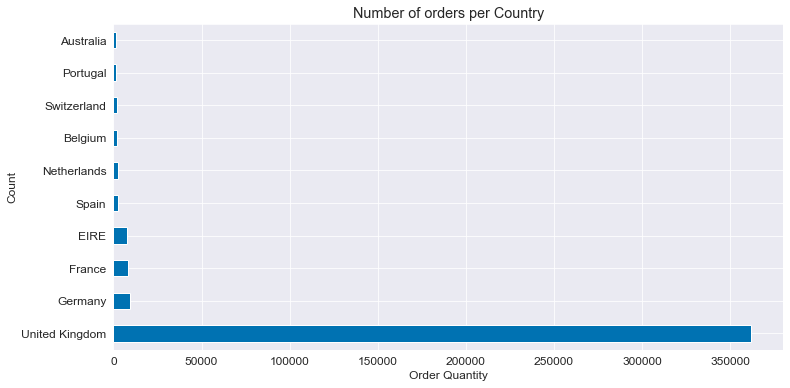

In [50]:

# Review which countries do the orders come from
df_pp.Country.value_counts()[0:10].plot(kind='barh');
plt.title('Number of orders per Country')
plt.xlabel('Order Quantity');
plt.ylabel('Count');

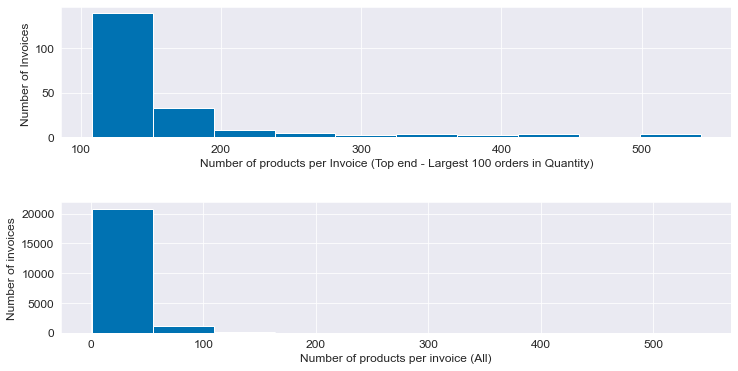

In [51]:
fig = plt.figure()

# Plotting the number of Quantities per invoice (Top end)
ax1 = fig.add_subplot(211)
df_pp.groupby('InvoiceNo').Quantity.count().sort_values(ascending = False )[:200].plot(kind = 'hist',ax=ax1)
ax1.xaxis.set_label_text('Number of products per Invoice (Top end - Largest 100 orders in Quantity)');
ax1.yaxis.set_label_text('Number of Invoices ');

# Plotting the number of Quantities per invoice (All)
ax2 = fig.add_subplot(212)
df_pp.groupby('InvoiceNo').Quantity.count().sort_values(ascending = False).plot(kind='hist', ax=ax2);
ax2.xaxis.set_label_text('Number of products per invoice (All)');
ax2.yaxis.set_label_text('Number of invoices');
fig.subplots_adjust(hspace=0.5)

## Modelling - Part 4 - RFM Modelling

### Recency Score 

In [52]:
# Generate new dataframe based on unique CustomerID to keep track of RFM scores
customer = pd.DataFrame(df_pp['CustomerID'].unique())
customer.columns = ['CustomerID']

In [53]:
# Generate new data frame based on latest Invoice date from retail_ppp dataframe per Customer (groupby = CustomerID)
recency = df_pp.groupby('CustomerID').InvoiceDate.max().reset_index()
recency.columns = ['CustomerID','LastPurchaseDate']

# Set observation point as the last invoice date in the dataset
LastInvoiceDate = recency['LastPurchaseDate'].max()

# Generate Recency in days by subtracting the Last Purchase date for each customer from the Last Invoice Date
recency['Recency'] = (LastInvoiceDate - recency['LastPurchaseDate']).dt.days

In [54]:
# Consolidate to customer DataFrame
customer = pd.merge(customer, recency[['CustomerID','Recency']], on='CustomerID')
customer.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,329


In [55]:
# Review statistics around Recency score 
customer.describe()

,CustomerID,Recency
count,4372.000000,4372.000000
mean,15299.677722,91.047118
std,1722.390705,100.765435
min,12346.000000,0.000000
25%,13812.750000,16.000000
50%,15300.500000,49.000000
75%,16778.250000,142.000000
max,18287.000000,373.000000


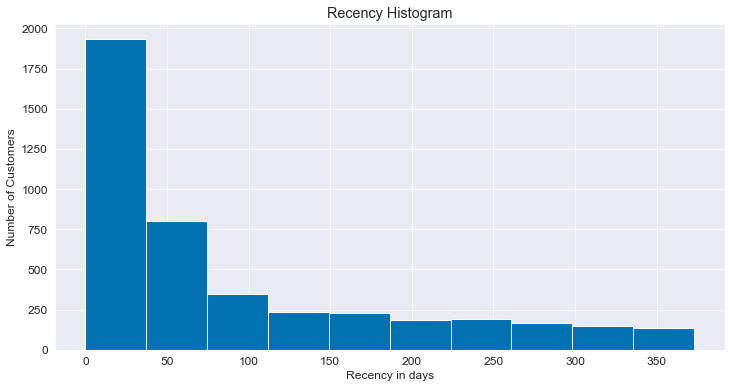

In [56]:
# Plot Recency
customer.Recency.plot.hist();
plt.xlabel("Recency in days")
plt.ylabel("Number of Customers")
plt.title("Recency Histogram");

### Frequency Score 

In [57]:
# Count number of invoices per CustomerID and store in new frequency Dataframe
frequency = df_pp.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

# Consolidate Frequency to existing Customer DataFrame
customer = pd.merge(customer, frequency, on='CustomerID')

In [58]:
customer.head()


,CustomerID,Recency,Frequency
0,17850.0,301,312
1,13047.0,31,196
2,12583.0,2,251
3,13748.0,95,28
4,15100.0,329,6


In [59]:
customer.describe()

,CustomerID,Recency,Frequency
count,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294
std,1722.390705,100.765435,232.471608
min,12346.000000,0.000000,1.000000
25%,13812.750000,16.000000,17.000000
50%,15300.500000,49.000000,42.000000
75%,16778.250000,142.000000,102.000000
max,18287.000000,373.000000,7983.000000


In [60]:
customer.Frequency.shape

(4372,)

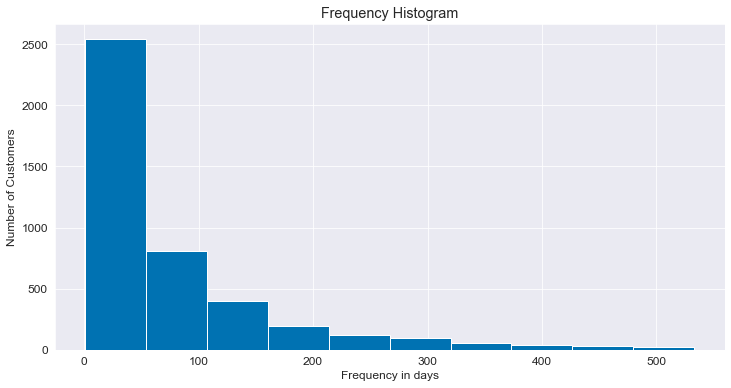

In [61]:
# Plot Frequency
# Frequency seems to have some outliers, with vey high frequency, but very few in numbers
# In order to plot effectively and not have a skewed diagram, we've sorted the frequencies
# and cropped the top 72 values in our diagram
customer.Frequency.sort_values().head(4300).plot.hist();
plt.xlabel("Frequency in days")
plt.ylabel("Number of Customers")
plt.title("Frequency Histogram");

### Monetery Value Score (Revenue)

Revenue per transaction calculated by (df_pp.UnitPrice * df_pp.Quantity)

In [62]:
df_pp['Revenue'] = df_pp.UnitPrice * df_pp.Quantity
df_pp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Day,Hours,Revenue
Date,,,,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,N,2010,12,201012,1,8,15.30
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,1,8,20.34
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,N,2010,12,201012,1,8,22.00
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,1,8,20.34
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,1,8,20.34


In [63]:
# Revenue per transaction has already been calculated as per KPIs section
# Grouping revenue per Customer ID
revenue = df_pp.groupby('CustomerID').Revenue.sum().reset_index()

# Consolidate Revenue to existing Customer DataFrame
customer = pd.merge(customer, revenue, on='CustomerID')
customer.head()

,CustomerID,Recency,Frequency,Revenue
0,17850.0,301,312,5288.63
1,13047.0,31,196,3079.10
2,12583.0,2,251,7187.34
3,13748.0,95,28,948.25
4,15100.0,329,6,635.10


In [64]:
customer.describe()

,CustomerID,Recency,Frequency,Revenue
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294,1898.459701
std,1722.390705,100.765435,232.471608,8219.345141
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,16.000000,17.000000,293.362500
50%,15300.500000,49.000000,42.000000,648.075000
75%,16778.250000,142.000000,102.000000,1611.725000
max,18287.000000,373.000000,7983.000000,279489.020000


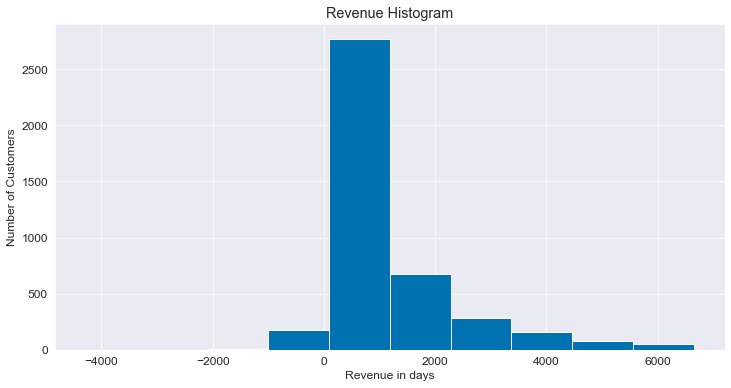

In [65]:
# Plot Revenue
customer.Revenue.sort_values().head(4200).plot.hist();
plt.xlabel("Revenue in days")
plt.ylabel("Number of Customers")
plt.title("Revenue Histogram");

Text(0, 0.5, 'Revenue')

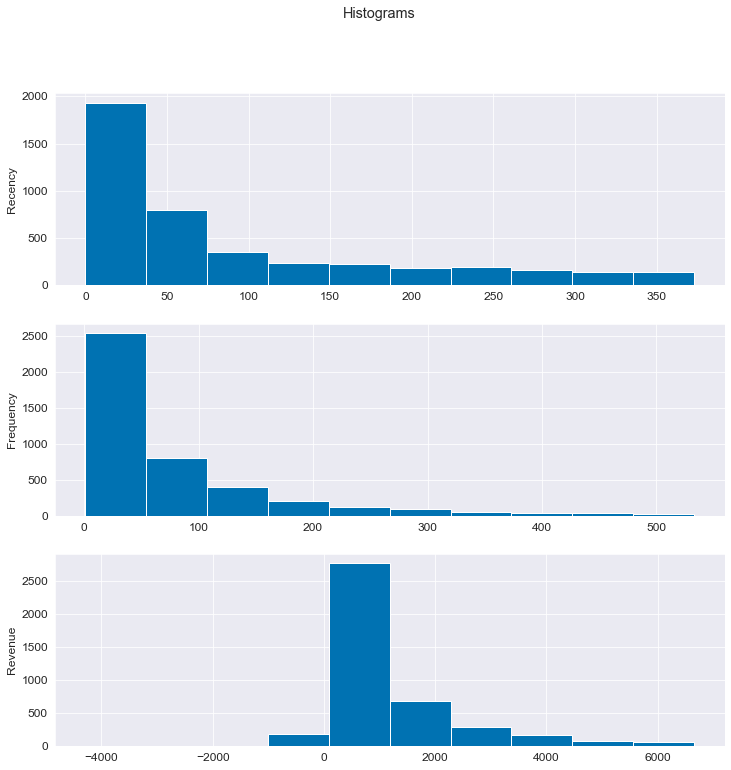

In [66]:
fig, (ax4, ax5, ax6) = plt.subplots(3)
fig.suptitle('Histograms')
customer.Recency.plot.hist(ax = ax4, figsize = (12,12));
customer.Frequency.sort_values().head(4300).plot.hist(ax = ax5);
customer.Revenue.sort_values().head(4200).plot.hist(ax = ax6);
ax4.set_ylabel('Recency')
ax5.set_ylabel('Frequency')
ax6.set_ylabel('Revenue')

## K-Means Clustering 

In [67]:
# Creating input features variable
X = customer.loc[:, 'Recency':'Revenue']
X.head()

,Recency,Frequency,Revenue
0,301,312,5288.63
1,31,196,3079.10
2,2,251,7187.34
3,95,28,948.25
4,329,6,635.10


In [68]:
X

,Recency,Frequency,Revenue
0,301,312,5288.63
1,31,196,3079.10
2,2,251,7187.34
3,95,28,948.25
4,329,6,635.10
...,...,...,...
4367,1,12,196.89
4368,1,18,343.50
4369,0,2,360.00
4370,0,12,227.39


In [69]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)
k=3

In [70]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [71]:
Xstd

,Recency,Frequency,Revenue
0,2.083819,0.941929,0.412510
1,-0.595978,0.442886,0.143658
2,-0.883808,0.679501,0.643541
3,0.039233,-0.279865,-0.115620
4,2.361724,-0.374511,-0.153723
...,...,...,...
4367,-0.893733,-0.348699,-0.207044
4368,-0.893733,-0.322886,-0.189205
4369,-0.903658,-0.391720,-0.187197
4370,-0.903658,-0.348699,-0.203333


In [72]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
rfc = KMeans(n_clusters=k, random_state=0)
rfc.fit(Xstd)

KMeans(n_clusters=3, random_state=0)

In [73]:
# Review output cluster labels
cluster_labels = rfc.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [0 1 1 ... 1 1 1]


In [74]:
# Review Centroids of clusters
centroids = rfc.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[ 1.53076400e+00 -2.80810509e-01 -1.74427230e-01]
 [-5.17104330e-01  5.17752777e-02  6.86884206e-03]
 [-8.63957712e-01  1.18416391e+01  1.42137753e+01]]


In [75]:
# Append clusters to input features table
Xstd['clusters'] = cluster_labels
Xstd.head()

,Recency,Frequency,Revenue,clusters
0,2.083819,0.941929,0.412510,0
1,-0.595978,0.442886,0.143658,1
2,-0.883808,0.679501,0.643541,1
3,0.039233,-0.279865,-0.115620,1
4,2.361724,-0.374511,-0.153723,0


### Evaluation Metrics - Silhouette and Inertia scores

In [76]:
from sklearn import metrics
metrics.silhouette_score(Xstd, cluster_labels, metric='euclidean')

0.6498453574598603

In [77]:
rfc.inertia_

5408.474380238328

In [78]:
##%pip install scikitplot

In [79]:
Xstd1=Xstd.drop(['clusters'],axis=1)

In [80]:
Xstd1

,Recency,Frequency,Revenue
0,2.083819,0.941929,0.412510
1,-0.595978,0.442886,0.143658
2,-0.883808,0.679501,0.643541
3,0.039233,-0.279865,-0.115620
4,2.361724,-0.374511,-0.153723
...,...,...,...
4367,-0.893733,-0.348699,-0.207044
4368,-0.893733,-0.322886,-0.189205
4369,-0.903658,-0.391720,-0.187197
4370,-0.903658,-0.348699,-0.203333


### K-Means optimization 

In [81]:
inertias = []
ss = []

for k in range(2,11):
    
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Xstd1)
    inertias.append(kmeans.inertia_)
    ss.append(metrics.silhouette_score(Xstd, kmeans.labels_, metric='euclidean'))


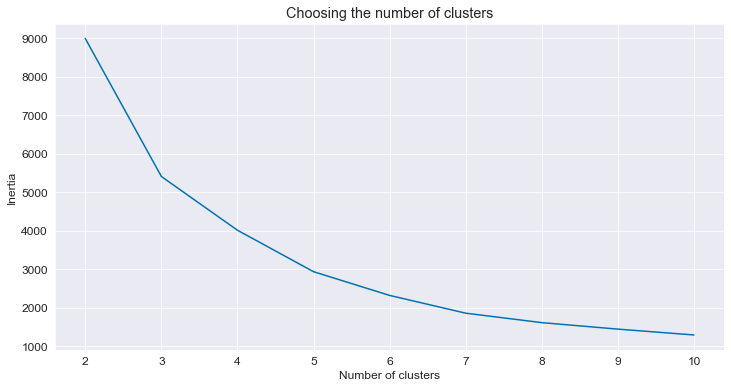

In [82]:
plt.plot(range(2, 11), inertias)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
# Based on Inertia graph the optimal K is 8 with the following Inertia value
min(inertias)

1296.6431189954828

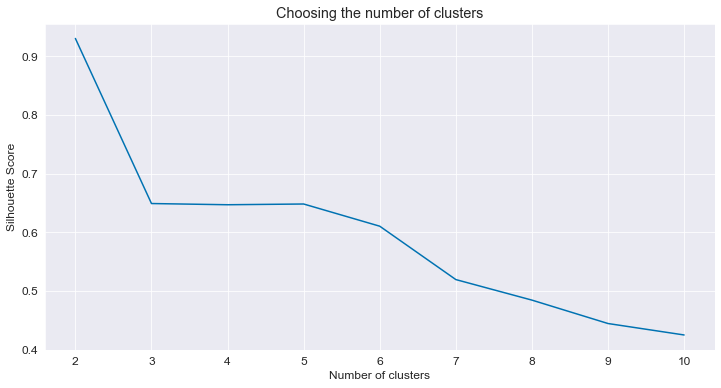

In [84]:
plt.plot(range(2, 11), ss)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Customer Dataframe and Visualization

In [85]:
customer['Cluster'] = cluster_labels
customer.Cluster.unique()

array([0, 1, 2])

In [86]:
customer['Profile'] = cluster_labels
customer['Profile'].replace({0: "Low Value", 1: "Mid Value", 2: "High Value"}, inplace = True)

In [87]:
customer.head(50)

,CustomerID,Recency,Frequency,Revenue,Cluster,Profile
0,17850.0,301,312,5288.63,0,Low Value
1,13047.0,31,196,3079.10,1,Mid Value
2,12583.0,2,251,7187.34,1,Mid Value
3,13748.0,95,28,948.25,1,Mid Value
4,15100.0,329,6,635.10,0,Low Value
5,15291.0,25,109,4596.51,1,Mid Value
6,14688.0,7,359,5107.38,1,Mid Value
7,17809.0,15,64,4627.62,1,Mid Value
8,15311.0,0,2491,59419.34,2,High Value
9,14527.0,2,1011,7711.38,1,Mid Value


In [88]:
customer.Profile.describe(include=['O'])

count          4372
unique            3
top       Mid Value
freq           3257
Name: Profile, dtype: object

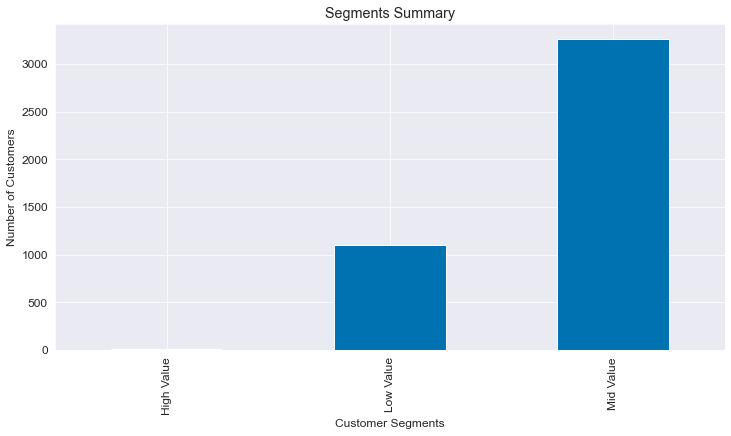

In [89]:
customer.groupby('Profile').Profile.count().plot.bar()
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Segments Summary");

1.Recency:maximum number of months passed since the customer last purchase..

2.Frequency:maximum no of purchase by customer in last 12 months

3.Revenue: Total amount spent by customers(quantity*unitprice)

After successfuly building model we find 3 segment of customers:

1.Low Segment
2.Mid Segment
3.High Segment


Business Actions
Once we have a clear view of the Segments above, specific actions can be planned across the Business (Operations, Marketing, Product, etc...) to address any potential issues;

High Value:
1.Improve Retention of these customers as they are the most valuable asset

Mid Value:
1.Increase Attention and Frequency and bring them closer to the brand and the product so eventually they become High Value

Low Value:
1.Increase Frequency and understand if there are any potential issues around the product or service

#### According to the model we concluded that mid value segment are most valuable to the store to do loyalty campaign for customers who are very valuable to them

In [90]:
file=open('model.pkl','wb')
joblib.dump(kmeans,file)
file.close()

In [91]:
model=joblib.load(open('model.pkl','rb'))

In [96]:
model.predict([['10000','3','30']])

array([2])